<a href="https://colab.research.google.com/github/yuribp0107/Curso-CNN-RX/blob/main/Taller_Analisis_de_datos_con_base_de_datos_sinteticos_de_Rx_de_torax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Instalacion de libreria**

In [3]:
# Importación de la librería pandas, fundamental para la manipulación y análisis de datos.
# Convención: pd
import pandas as pd

# Importación de NumPy, la biblioteca base para cálculo numérico con arrays y operaciones matemáticas de bajo nivel.
# Convención: np
import numpy as np

# Importar matplotlib.pyplot, módulo principal de Matplotlib para la generación de gráficos estáticos.
# Convención: plt
import matplotlib.pyplot as plt


# El módulo math proporciona funciones matemáticas básicas (trigonometría, logaritmos, constantes π, e, etc.).
import math



##**Dataframe**

In [ ]:
# 1. Cargar el archivo Excel en un DataFrame de pandas
df = pd.read_excel('/content/Datos_sintestis_RX_torax.xlsx')

# 2. Mostrar el DataFrame completo en la salida
df #Útil para una inspección rápida, aunque suele ser muy extenso.

In [ ]:
# 3. Ver las primeras 10 filas
df.head(10)

In [ ]:
# 4. Listar los nombres de todas las columnas
#    Para saber qué variables tenemos disponibles.
df.columns

In [7]:
# 5. Eliminar la columna 'case_id'
#    - columns=['case_id']: indicamos la columna a eliminar.
#    - inplace=True: hacemos el cambio sobre el mismo DataFrame, sin crear uno nuevo.
df.drop(columns=['case_id'], inplace=True)

In [ ]:
# 6. Volver a listar las columnas
#    Para confirmar que 'case_id' se ha eliminado correctamente.
df.columns

In [ ]:
# 7. Seleccionar la serie correspondiente a la columna "etiqueta"
df["etiqueta"]

In [ ]:
# 8. Contar cuántas veces aparece cada valor en "etiqueta"
#    value_counts() devuelve una Serie indexada por los valores únicos,
#    con la frecuencia de aparición como valores.
conteos = df["etiqueta"].value_counts()
# 9. Mostrar el objeto 'conteos'
conteos

In [ ]:
# 10. Extraer solo los valores de la Serie 'conteos' como un array de NumPy
#     Útil cuando necesitas los números por separado, sin el índice.
conteos.values

In [ ]:
# 11. Hacer lo mismo pero en una única línea encadenando métodos
#     Muestra directamente el array de frecuencias sin guardar la Serie intermedia.
df["etiqueta"].value_counts().values

In [ ]:

# 12. Obtener los valores únicos de la columna "etiqueta"
#     unique() devuelve un array con cada etiqueta distinta, sin repeticiones.
df["etiqueta"].unique()

##**Descripcion de los datos**

In [ ]:
# Mostrar información resumida del DataFrame `df`:
# - Índice: rango o etiquetas de fila.
# - Columnas: nombre, tipo de dato y número de valores no nulos por columna.
# - Tipos de datos (dtypes) de cada columna.
# - Uso aproximado de memoria.
df.info()

##**Exploracion de datos**

###**Graficos de Barras para cada columna del dataframe**

In [ ]:
# Recorremos cada columna del DataFrame para visualizar su distribución de valores
for col in df.columns:
    # 1. Calculamos la frecuencia de cada valor en la columna actual
    counts = df[col].value_counts()

    # 2. Creamos una nueva figura para este gráfico (evita sobreescribir anteriores)
    plt.figure()

    # 3. Dibujamos un gráfico de barras con las frecuencias
    ax = counts.plot(kind='bar')

    # 4. Añadimos un título que indique claramente qué columna estamos graficando
    plt.title(f'Distribución de {col}')

    # 5. Etiquetamos el eje X con el nombre de la columna
    plt.xlabel(col)

    # 6. Etiquetamos el eje Y como “Conteo” para reflejar las cantidades
    plt.ylabel('Conteo')

    # 7. Rotamos las etiquetas del eje X 45° para que no se monten y sean legibles
    plt.xticks(rotation=45)

    # 8. Iteramos sobre cada barra (índice y valor) para poner el número encima
    for i, value in enumerate(counts):
        #   - i: posición de la barra
        #   - value: altura de la barra (frecuencia)
        ax.text(
            i,              # posición horizontal
            value + 1,      # un puntito por encima de la barra
            str(value),     # texto a mostrar
            ha='center',    # centrado horizontal
            va='bottom',    # pegado justo arriba de la barra
            fontsize=9      # tamaño de fuente legible sin saturar
        )

    # 9. Ajustamos automáticamente márgenes y espacios para evitar recortes
    plt.tight_layout()

    # 10. Mostramos el gráfico en pantalla
    plt.show()


###**Graficos de Barras filtrado por columna selecciona por usuario**

Columnas disponibles:
0: etiqueta
1: volume_lobar
2: opacificacion
3: broncogramas
4: borde_fisura
5: signo_silueta
6: desplazamiento_mediastinico
7: diafragma_ipsilateral
8: hiperinsuflacion_compensadora
9: crowding_vascular
10: forma_lobar_global

Ingresa el número de la columna (0-10): 0


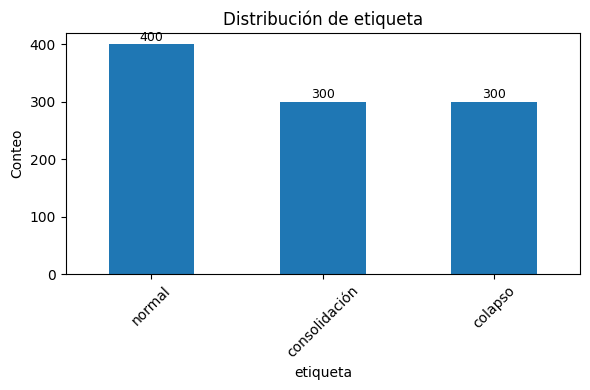

In [20]:
# 1. Obtenemos la lista de columnas del DataFrame `df`
cols = df.columns

# 2. Informamos al usuario qué columnas existen, junto con su índice numérico
print("Columnas disponibles:")
for idx, name in enumerate(cols):
    #    - idx: posición (0-based) en la lista de columnas
    #    - name: nombre de la columna
    print(f"{idx}: {name}")

# 3. Solicitamos al usuario que elija una columna por su número
try:
    sel = int(input(f"\nIngresa el número de la columna (0-{len(cols)-1}): "))
    col = cols[sel]  # Si la selección es válida, almacenamos el nombre de la columna elegida
except (ValueError, IndexError):
    # 4. En caso de error de conversión o índice fuera de rango:
    print("Selección inválida. Se usará la columna 'etiqueta' por defecto.")
    col = cols[1]   # Elegimos por defecto la segunda columna (índice 1), típicamente 'etiqueta'

# 5. Contamos la frecuencia de cada valor en la columna elegida
counts = df[col].value_counts()

# 6. Creamos la figura para graficar; especificamos un tamaño confortable (6x4 pulgadas)
plt.figure(figsize=(6, 4))

# 7. Dibujamos un gráfico de barras de las frecuencias
ax = counts.plot(kind='bar')

# 8. Añadimos título y etiquetas de ejes para claridad
plt.title(f'Distribución de {col}')
plt.xlabel(col)
plt.ylabel('Conteo')

# 9. Rotamos las etiquetas del eje X 45° para mejorar la legibilidad
plt.xticks(rotation=45)

# 10. Colocamos el valor numérico encima de cada barra
for i, v in enumerate(counts.values):
    #    - i: posición de la barra
    #    - v: altura (frecuencia)
    ax.text(
        i,           # coordenada x
        v + 1,       # un poquito por encima de la barra
        str(v),      # texto a mostrar (la cantidad)
        ha='center', # centrado horizontal
        va='bottom', # alineado justo encima de la barra
        fontsize=9   # tamaño de letra legible
    )

# 11. Ajustamos márgenes para evitar que se corten etiquetas
plt.tight_layout()

# 12. Mostramos el gráfico final al usuario
plt.show()


###**Distribución comparativa de hallazgos radiográficos de tórax sugun etiqueta**

In [29]:
# 1. Definimos una lista con las columnas que queremos excluir (en este caso solo 'etiqueta')
to_drop = ['etiqueta']

# 2. Calculamos la lista de características (features) tomando todas las columnas del DataFrame
#    y restando las de `to_drop`. `difference()` devuelve un Index con las columnas restantes,
#    y `.tolist()` lo convierte en una lista de Python.
features = df.columns.difference(to_drop).tolist()

# 3. Imprimimos el listado de hallazgos radiológicos (features)
#    Nota la coma entre el texto y la variable, que corrige el error de sintaxis original.
print("Lista hallazgos radiológicos 'features':", features)

# 4. Extraemos los valores únicos de la columna 'etiqueta'
#    Estos serán nuestras etiquetas (labels) para clasificación o análisis posterior.
labels = df["etiqueta"].unique()


Lista hallazgos radiológicos 'features': ['borde_fisura', 'broncogramas', 'crowding_vascular', 'desplazamiento_mediastinico', 'diafragma_ipsilateral', 'forma_lobar_global', 'hiperinsuflacion_compensadora', 'opacificacion', 'signo_silueta', 'volume_lobar']


In [ ]:
# Definir distribución de subplots
n = len(features)
ncols = 3
nrows = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
axes = axes.flatten()
total = len(df)

# Graficar cada característica en su subplot
for idx, (ax, col) in enumerate(zip(axes, features)):
    # 1. Construir una tabla de contingencia entre la columna de interés y la etiqueta:
    #    - Filas: valores únicos en df[col]
    #    - Columnas: cada una de las posibles etiquetas en df['etiqueta']
    cross_tab = pd.crosstab(df[col], df['etiqueta'])

    # 2. Graficar la tabla de contingencia como un gráfico de barras apiladas/múltiples:
    #    - kind='bar': barras verticales
    #    - ax=ax: dibujar sobre el subplot especificado
    #    - legend=False: ocultar leyenda, se unificará más tarde si es necesario
    cross_tab.plot(kind='bar', ax=ax, legend=False)

    # 3. Título del subplot, indicando claramente la variable analizada y el desglose por etiqueta
    ax.set_title(f'Distribución de {col} por etiqueta')

    # 4. Etiqueta del eje X con el nombre de la variable actual
    ax.set_xlabel(col)

    # 5. Etiqueta del eje Y para indicar que las alturas representan conteos de registros
    ax.set_ylabel('Conteo')

    # 6. Ajuste de las marcas del eje X:
    #    - rotation=45: rotar etiquetas 45° para evitar que se amontonen
    #    - axis='x': aplica solo al eje horizontal
    ax.tick_params(axis='x', rotation=45)

    # ————— Aquí calculamos el valor máximo de altura de barra —————
    max_height = max(patch.get_height() for patch in ax.patches)
    # Elevamos el límite superior un 15% para que haya espacio
    ax.set_ylim(0, max_height * 1.15)

    # Etiquetar cada barra con conteo y porcentaje sobre total
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            percent = height / total * 100
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                height + max_height*0.02,  # colocamos la etiqueta un poquito más arriba
                f"{int(height)}\n{percent:.1f}%",
                ha='center',
                va='bottom',
                fontsize=7
            )
# Unificar leyenda en la parte superior
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), frameon=False)

# Ajuste del layout para no solapar la leyenda
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###**Tabla de contingencia DataFrame con índice múltiple**

In [28]:
# 1. Construir una lista de tuplas (feature, valor) para el índice de filas
row_tuples = []
for feat in features:
    #   - feat: nombre de la característica (columna) actual
    unique_vals = sorted(df[feat].unique())
    #   - unique_vals: lista ordenada de los valores únicos en esa columna
    for val in unique_vals:
        #   - val: cada valor posible de la característica
        row_tuples.append((feat, val))
        # Añadimos la tupla (feature, valor) a la lista

# 2. Crear un MultiIndex a partir de esas tuplas
#    - names: etiquetas para los niveles del índice
index = pd.MultiIndex.from_tuples(row_tuples, names=['Característica', 'Valor'])

# 3. Inicializar un DataFrame de ceros:
#    - index: el MultiIndex construido (filas)
#    - columns: las etiquetas únicas (labels) como columnas
contingency_df = pd.DataFrame(0, index=index, columns=labels)

# 4. Rellenar el DataFrame con los conteos de cada combinación (feature, valor) vs etiqueta
for feat, val in row_tuples:
    # Seleccionamos las filas donde df[feat] == val y contamos las etiquetas
    counts = df[df[feat] == val]['etiqueta'].value_counts()
    for lbl in labels:
        # Para cada etiqueta (lbl), asignamos el conteo correspondiente
        # counts.get(lbl, 0) devuelve 0 si la combinación no aparece
        contingency_df.loc[(feat, val), lbl] = counts.get(lbl, 0)

# 5. Mostrar el DataFrame de contingencia resultante
contingency_df


consolidación  colapso  normal
Característica                Valor                                     
borde_fisura                  ausente               191        0     400
                              presente              109      300       0
broncogramas                  ausentes                0      300     400
                              presentes             300        0       0
crowding_vascular             ausente               300        0     238
                              leve                    0       26     162
                              moderado                0       24       0
                              presente                0      250       0
desplazamiento_mediastinico   ausente               172        0     400
                              leve                  128        0       0
                              presente                0      300       0
diafragma_ipsilateral         elevado               123      269     155
                              moderado                0       31       0
                              normal                177        0     245
forma_lobar_global            ausente               300        0     239
                              leve                    0       26     125
                              moderado                0       36      36
                              presente                0      238       0
hiperinsuflacion_compensadora ausente               300        0     400
                              presente                0      300       0
opacificacion                 ausente                 0        0     400
                              presente              300      300       0
signo_silueta                 ausente                 0      300     400
                              presente              300        0       0
volume_lobar                  disminuido              0      300       0
                              neutro                300        0     400

##**Test de Chi-cuadrado**

In [40]:
# Desde scipy.stats, traemos funciones para pruebas de independencia:
# - chi2_contingency: test de chi-cuadrado para tablas de contingencia.
# - fisher_exact: test exacto de Fisher para tablas 2×2 pequeñas.
from scipy.stats import chi2_contingency, fisher_exact


# 1. Definimos el umbral de significación estadística
#    (alpha = 0.05). Si p-value < alpha, consideramos la asociación significativa.
# El umbral usado para este caso será de 0.05

# 2. Preparamos un diccionario para guardar resultados por característica
results_dict = {}

# 3. Iteramos sobre cada columna (salvo la última, asumida como etiqueta)
for col in df.columns[:-1]:
    # 3.1. Construimos la tabla de contingencia entre la variable y la etiqueta
    tabla = pd.crosstab(df[col], df['etiqueta'])

    # 3.2. Aplicamos el test de chi-cuadrado de independencia
    #      Devuelve: chi2 (estadístico), p-value, dof (grados de libertad), expected (frecuencias esperadas)
    chi2, pval, dof, expected = chi2_contingency(tabla)

    # 3.3. Guardamos en el diccionario el estadístico y el p-value
    results_dict[col] = {'Chi-cuadrado': chi2, 'P-value': pval}

# 4. Convertimos el diccionario en un DataFrame para facilitar la inspección
results_df = pd.DataFrame.from_dict(results_dict, orient='index')

# 5. Mostramos la tabla de resultados:
#    Cada fila es una característica y las columnas Chi-cuadrado y P-value.
results_df



,Chi-cuadrado,P-value
etiqueta,2000.000000,0.000000e+00
volume_lobar,1000.000000,7.124576e-218
opacificacion,1000.000000,7.124576e-218
broncogramas,1000.000000,7.124576e-218
borde_fisura,712.903551,1.566610e-155
signo_silueta,1000.000000,7.124576e-218
desplazamiento_mediastinico,1298.368298,7.515236e-280
diafragma_ipsilateral,349.350121,2.422675e-74
hiperinsuflacion_compensadora,1000.000000,7.124576e-218
crowding_vascular,1095.144942,2.342809e-233


##**Análisis univariado**

In [60]:
import statsmodels.api as sm

def univariate_logistic_to_excel(df, etiqueta_col='etiqueta', output_path='resultados_univariado.xlsx'):
    # 1) Crear targets binarios
    etiquetas = df[etiqueta_col].unique()
    for lab in etiquetas:
        df[f'target_{lab}'] = (df[etiqueta_col] == lab).astype(int)

    # 2) Preparar X
    drop_cols = [etiqueta_col] + [f'target_{lab}' for lab in etiquetas]
    X = pd.get_dummies(df.drop(columns=drop_cols), drop_first=True).astype(float)

    # 3) Calcular regresiones logísticas univariantes
    resultados_por_etiqueta = {}
    for lab in etiquetas:
        y = df[f'target_{lab}'].astype(float)
        registros = []
        for feat in X.columns:
            Xi = sm.add_constant(X[[feat]], has_constant='add')
            try:
                modelo = sm.Logit(y, Xi).fit(disp=False)
                or_val     = np.exp(modelo.params[feat])
                ci_low, ci_up = modelo.conf_int().loc[feat].apply(np.exp)
                pval       = modelo.pvalues[feat]
            except Exception:
                or_val, ci_low, ci_up, pval = [np.nan] * 4

            registros.append({
                'feature':    feat,
                'odds_ratio': or_val,
                'ci_lower':   ci_low,
                'ci_upper':   ci_up,
                'p_value':    pval
            })

        df_res = pd.DataFrame(registros).set_index('feature').sort_index()
        resultados_por_etiqueta[lab] = df_res

    # 4) Exportar a Excel con una hoja por etiqueta
    #    No especificamos engine: pandas elegirá openpyxl si está instalado
    with pd.ExcelWriter(output_path) as writer:
        for lab, df_res in resultados_por_etiqueta.items():
            sheet_name = str(lab)[:31]  # Excel limita a 31 caracteres
            df_res.to_excel(writer, sheet_name=sheet_name)

    print(f"Resultados exportados a '{output_path}' con {len(etiquetas)} hojas.")

# Uso:
univariate_logistic_to_excel(df, etiqueta_col='etiqueta', output_path='mi_analisis_univariado.xlsx')


✅ Resultados exportados a 'mi_analisis_univariado.xlsx' con 3 hojas.
